# PC4 - Cepages dataset

cours [MAP 535](https://moodle.polytechnique.fr/course/view.php?id=14763): Regression de Karim Lounici

auteur de ce notebook python : Marc Lelarge

We consider the dataset “CepagesB.csv” of 36 observations and 10 variables. We want to explain Y=pH with respect to the others variables.

- pH : pH of the wine.
- Origine: factor which admits I=2 modalities : Bordeaux and Bourgogne.
- Couleur : factor which admits I=2 modalities : Blanc and Rouge.
- Alcool : It is the alcohol content of the wine.
- Malique : Malic acid that reflects greenness / biting wine (green apple).
- Tartrique : Tartaric acid that reflects hardness / structure of the wine (the acid most present in the grapes).
- Citrique : Citric acid that reflects freshness of the wine (lemony taste).
- Acetique : Acetic acid is a natural organic acid, the main constituent of the volatile acidity of a wine.
- Lactique : Lactic acid is an organic acid that plays a role in various biochemical processes.
- AcTot : Total acidity.

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
#from patsy import dmatrices

## Part 1. Descriptive analysis.

### Question 1. Check the nature of the dataset and make the necessary changes.

In [2]:
df = pd.read_csv('./CepagesB.csv', sep=";" , index_col="Libelle")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 1 to 36
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Origine    36 non-null     object
 1   Couleur    36 non-null     object
 2   Alcool     36 non-null     object
 3   pH         36 non-null     object
 4   AcTot      36 non-null     int64 
 5   Tartrique  36 non-null     object
 6   Malique    36 non-null     object
 7   Citrique   36 non-null     object
 8   Acetique   36 non-null     object
 9   Lactique   36 non-null     object
dtypes: int64(1), object(9)
memory usage: 3.1+ KB


In [4]:
df.head()

,Origine,Couleur,Alcool,pH,AcTot,Tartrique,Malique,Citrique,Acetique,Lactique
Libelle,,,,,,,,,,
1,Bordeaux,Blanc,12,"2,84",89,"21,1",21,"4,3","16,9","9,3"
2,Bordeaux,Blanc,"11,5","3,1",97,"26,4","34,2","3,9","9,9",16
3,Bordeaux,Blanc,"14,6","2,96",99,"20,7","21,8","8,1","19,7","11,2"
4,Bordeaux,Blanc,"10,5","3,1",72,"29,7","4,2","3,6","11,9","14,4"
5,Bordeaux,Blanc,14,"3,29",76,"22,3","9,3","4,7","20,1","21,6"


In [5]:
for col in df.columns[2:]:#['Alcool', 'pH', 'AcTot', 'Tartrique', 'Malique', 'Citrique', 'Acetique', 'Lactique']:
    df[col] = [float(str(i).replace(",", ".")) for i in df[col]]

In [6]:
df.head()

,Origine,Couleur,Alcool,pH,AcTot,Tartrique,Malique,Citrique,Acetique,Lactique
Libelle,,,,,,,,,,
1,Bordeaux,Blanc,12.0,2.84,89.0,21.1,21.0,4.3,16.9,9.3
2,Bordeaux,Blanc,11.5,3.10,97.0,26.4,34.2,3.9,9.9,16.0
3,Bordeaux,Blanc,14.6,2.96,99.0,20.7,21.8,8.1,19.7,11.2
4,Bordeaux,Blanc,10.5,3.10,72.0,29.7,4.2,3.6,11.9,14.4
5,Bordeaux,Blanc,14.0,3.29,76.0,22.3,9.3,4.7,20.1,21.6


### Question 2. Display the Table of counts according to Color and Origin

In [7]:
df['Couleur'].unique()

array(['Blanc', 'Rouge'], dtype=object)

In [8]:
df.groupby(['Couleur'])['Couleur'].count()

Couleur
Blanc    18
Rouge    18
Name: Couleur, dtype: int64

In [9]:
df.groupby(['Origine'])[['Origine']].count()

,Origine
Origine,
Bordeaux,18
Bourgogne,18


### Question 3. Display the table of the average pH according to Couleur modalities. Display the table of the average pH according to Couleur modalities and Origine modalities.

In [10]:
df_col = df.groupby(['Couleur']).mean()

In [11]:
df_col['pH']

Couleur
Blanc    3.040556
Rouge    3.414444
Name: pH, dtype: float64

In [12]:
df_col_org = df.groupby(['Couleur', 'Origine']).mean()

In [13]:
df_col_org.head()

Alcool        pH       AcTot  Tartrique    Malique  \
Couleur Origine                                                            
Blanc   Bordeaux   12.866667  3.102222   85.888889  24.133333  18.466667   
        Bourgogne  11.988889  2.978889  101.777778  40.088889  23.688889   
Rouge   Bordeaux   11.177778  3.421111   76.000000  26.344444   2.644444   
        Bourgogne  13.366667  3.407778   80.555556  32.733333   3.244444   

                   Citrique   Acetique   Lactique  
Couleur Origine                                    
Blanc   Bordeaux   5.311111  16.333333  13.655556  
        Bourgogne  4.233333  12.466667  14.711111  
Rouge   Bordeaux   1.466667  18.133333  24.255556  
        Bourgogne  2.144444  15.744444  26.988889

In [14]:
df_col_org['pH']

Couleur  Origine  
Blanc    Bordeaux     3.102222
         Bourgogne    2.978889
Rouge    Bordeaux     3.421111
         Bourgogne    3.407778
Name: pH, dtype: float64

### Question 4. Plot the regression lines of pH over AcTot for the different modalities of Couleur. Display boxplots for pH based on color modalities. Comments

hint: [seaborn.lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html)

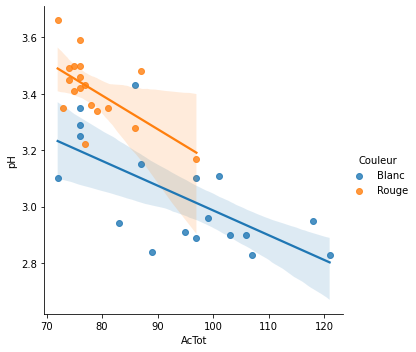

In [15]:
sns.lmplot(x='AcTot',y='pH',hue='Couleur',data=df,ci=95);

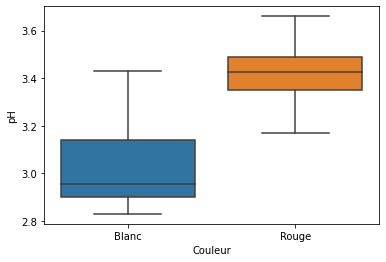

In [16]:
sns.boxplot(x='Couleur',y='pH',data=df);

**Answer :** We observe two distinct regression lines and two distinct boxplots. The color seems to have an impact on the pH. However, the slopes appear to be the same, so we assume that there is no interaction between ATtot and Couleur.

### Question 5. Plot the regression lines of ph over AcTot for the different modalities of Origine. Display boxplots for pH based on color modalities. Comments

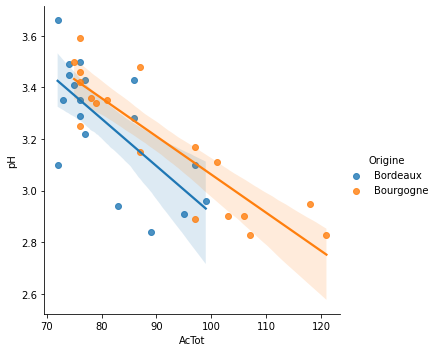

In [17]:
sns.lmplot(x='AcTot',y='pH',hue='Origine',data=df,ci=95);

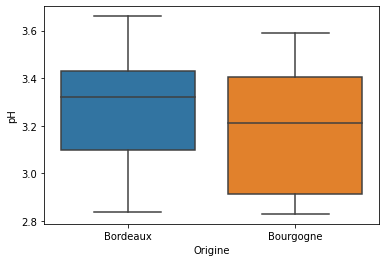

In [18]:
sns.boxplot(x='Origine',y='pH',data=df);

**Answer :** The impact is less obvious here

## Part 2. Ancova 2 factors model

We want to explain the pH as a function of the AcTot and Couleur (consider interaction between AcTot and Couleur).

### Question 1. Compute this Ancova 2 factor Model with default constraint

hint: [anova_lm](https://www.statsmodels.org/dev/generated/statsmodels.stats.anova.anova_lm.html)

Useful blog: [ANOVA using Python (with examples)](https://www.reneshbedre.com/blog/anova.html)

In [19]:
from statsmodels.formula.api import ols

In [20]:
model_ancova = ols('pH ~ Couleur * AcTot * Origine', df).fit()

### Question 2. Test the influence of the regressor with “anova()” and “Anova()”. Comments.

In [21]:
def stars(df):
    # Thanks Baptiste!
    n = len(df)
    l = []
    for i in range(n):
        if df.iloc[i, -1] < 0.001:
            l.append('***')
        elif df.iloc[i, -1] >= 0.001 and df.iloc[i, -1] < 0.01:
            l.append('**')
        elif df.iloc[i, -1] >= 0.01 and df.iloc[i, -1] < 0.05:
            l.append('*')
        elif df.iloc[i, -1] >= 0.05 and df.iloc[i, -1] < 0.1:
            l.append('.')
        else:
            l.append('')
    df['stars'] = l
    return df

In [22]:
anova_table1 = sm.stats.anova_lm(model_ancova, typ=1)
print(anova_table1)

                         df    sum_sq   mean_sq          F        PR(>F)
Couleur                 1.0  1.258136  1.258136  72.908888  2.785197e-09
Origine                 1.0  0.042025  0.042025   2.435345  1.298605e-01
Couleur:Origine         1.0  0.027225  0.027225   1.577687  2.194741e-01
AcTot                   1.0  0.295320  0.295320  17.113778  2.908141e-04
Couleur:AcTot           1.0  0.007882  0.007882   0.456753  5.046895e-01
AcTot:Origine           1.0  0.004367  0.004367   0.253065  6.188596e-01
Couleur:AcTot:Origine   1.0  0.002144  0.002144   0.124252  7.271069e-01
Residual               28.0  0.483176  0.017256        NaN           NaN


In [23]:
stars(anova_table1)

,df,sum_sq,mean_sq,F,PR(>F),stars
Couleur,1.0,1.258136,1.258136,72.908888,2.785197e-09,***
Origine,1.0,0.042025,0.042025,2.435345,1.298605e-01,
Couleur:Origine,1.0,0.027225,0.027225,1.577687,2.194741e-01,
AcTot,1.0,0.295320,0.295320,17.113778,2.908141e-04,***
Couleur:AcTot,1.0,0.007882,0.007882,0.456753,5.046895e-01,
AcTot:Origine,1.0,0.004367,0.004367,0.253065,6.188596e-01,
Couleur:AcTot:Origine,1.0,0.002144,0.002144,0.124252,7.271069e-01,
Residual,28.0,0.483176,0.017256,NaN,NaN,


In [24]:
anova_table2 = sm.stats.anova_lm(model_ancova, typ=2)
print(anova_table2)

                         sum_sq    df          F    PR(>F)
Couleur                0.244576   1.0  14.173164  0.000787
Origine                0.009609   1.0   0.556814  0.461766
Couleur:Origine        0.004144   1.0   0.240159  0.627909
AcTot                  0.295320   1.0  17.113778  0.000291
Couleur:AcTot          0.008691   1.0   0.503651  0.483769
AcTot:Origine          0.004367   1.0   0.253065  0.618860
Couleur:AcTot:Origine  0.002144   1.0   0.124252  0.727107
Residual               0.483176  28.0        NaN       NaN


In [25]:
stars(anova_table2)

,sum_sq,df,F,PR(>F),stars
Couleur,0.244576,1.0,14.173164,0.000787,***
Origine,0.009609,1.0,0.556814,0.461766,
Couleur:Origine,0.004144,1.0,0.240159,0.627909,
AcTot,0.295320,1.0,17.113778,0.000291,***
Couleur:AcTot,0.008691,1.0,0.503651,0.483769,
AcTot:Origine,0.004367,1.0,0.253065,0.618860,
Couleur:AcTot:Origine,0.002144,1.0,0.124252,0.727107,
Residual,0.483176,28.0,NaN,NaN,


**Answer :** Type I and II tests only select the covariate AcTot and the factor Couleur

### Question 3. Compute the regression model of the pH on AcTot and Couleur (do not consider interaction between AcTot and Couleur). Display a “summary” of this model and discuss the outputs

In [26]:
model_ancovaWI = ols('pH ~ AcTot + Couleur', df).fit()

In [27]:
print(model_ancovaWI.summary())

                            OLS Regression Results                            
Dep. Variable:                     pH   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     52.68
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           5.36e-11
Time:                        18:58:15   Log-Likelihood:                 25.694
No. Observations:                  36   AIC:                            -45.39
Df Residuals:                      33   BIC:                            -40.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.9101      0.183  

## Part 3. What about the full dataset ?

### Question 1. Compute the complete model, i.e. the linear regression of the pH over all the others variable.

In [28]:
all_notpH = [index for index in df.columns if index != 'pH']

In [29]:
all_notpH

['Origine',
 'Couleur',
 'Alcool',
 'AcTot',
 'Tartrique',
 'Malique',
 'Citrique',
 'Acetique',
 'Lactique']

In [30]:
str_all = all_notpH[0]
for ind in all_notpH[1:]:
    str_all += ' + '
    str_all += ind

In [31]:
str_all

'Origine + Couleur + Alcool + AcTot + Tartrique + Malique + Citrique + Acetique + Lactique'

In [32]:
model_all = ols('pH ~ '+str_all, df).fit()

In [33]:
print(model_all.summary())

                            OLS Regression Results                            
Dep. Variable:                     pH   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     33.13
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           5.12e-12
Time:                        18:58:15   Log-Likelihood:                 45.313
No. Observations:                  36   AIC:                            -70.63
Df Residuals:                      26   BIC:                            -54.79
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.0403 

### Question 2. Which model is selected with the test of type I. Compute this model.

In [34]:
anova_table1 = sm.stats.anova_lm(model_all, typ=1)
stars(anova_table1)

,df,sum_sq,mean_sq,F,PR(>F),stars
Origine,1.0,0.042025,0.042025,6.425876,1.760488e-02,*
Couleur,1.0,1.258136,1.258136,192.376602,1.587472e-13,***
Alcool,1.0,0.081234,0.081234,12.421225,1.594278e-03,**
AcTot,1.0,0.252995,0.252995,38.684487,1.400429e-06,***
Tartrique,1.0,0.135794,0.135794,20.763668,1.083164e-04,***
Malique,1.0,0.031711,0.031711,4.848737,3.673758e-02,*
Citrique,1.0,0.000305,0.000305,0.046571,8.308253e-01,
Acetique,1.0,0.015045,0.015045,2.300439,1.414030e-01,
Lactique,1.0,0.132992,0.132992,20.335235,1.226999e-04,***
Residual,26.0,0.170039,0.006540,NaN,NaN,


In [35]:
modanov1 = ols('pH ~  Origine + Couleur + Alcool + AcTot + Tartrique + Malique + Lactique', df).fit()
print(modanov1.summary())

                            OLS Regression Results                            
Dep. Variable:                     pH   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     35.80
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           2.48e-12
Time:                        18:58:15   Log-Likelihood:                 41.251
No. Observations:                  36   AIC:                            -66.50
Df Residuals:                      28   BIC:                            -53.83
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.0963 

### Question 3. Which model is selected with the test of type II. Compute this model.

In [36]:
anova_table2 = sm.stats.anova_lm(model_all, typ=2)
stars(anova_table2)

,sum_sq,df,F,PR(>F),stars
Origine,0.009593,1.0,1.466833,2.367400e-01,
Couleur,0.191182,1.0,29.232901,1.152445e-05,***
Alcool,0.000530,1.0,0.080987,7.782193e-01,
AcTot,0.277870,1.0,42.488003,6.554866e-07,***
Tartrique,0.009793,1.0,1.497459,2.320373e-01,
Malique,0.120321,1.0,18.397741,2.191476e-04,***
Citrique,0.009836,1.0,1.503926,2.310593e-01,
Acetique,0.041836,1.0,6.396956,1.783512e-02,*
Lactique,0.132992,1.0,20.335235,1.226999e-04,***
Residual,0.170039,26.0,NaN,NaN,


In [37]:
modanov2 = ols('pH ~  Couleur + AcTot + Acetique + Malique + Lactique', df).fit()
print(modanov2.summary())

                            OLS Regression Results                            
Dep. Variable:                     pH   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     50.32
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           1.09e-13
Time:                        18:58:15   Log-Likelihood:                 40.201
No. Observations:                  36   AIC:                            -68.40
Df Residuals:                      30   BIC:                            -58.90
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.0282      0.175  

### Question 4. We propose the above model ‘modB’. Compare its AIC with the AIC of the 4 previous model (Part 1- Q1, Part 2-Q3, Part 3-Q2, Part 3- Q3). Which model do you prefer?

In [38]:
modB = ols('pH ~ Origine + Couleur + AcTot  + Malique  + Acetique + Lactique', df).fit()

In [39]:
print(modB.summary())

                            OLS Regression Results                            
Dep. Variable:                     pH   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     49.51
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           6.22e-14
Time:                        18:58:15   Log-Likelihood:                 43.449
No. Observations:                  36   AIC:                            -72.90
Df Residuals:                      29   BIC:                            -61.81
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.1504 

### Question 5. Does the postulates are validated. What about the outliers?

In [40]:
list_names = ['modanov1', 'modanov2', 'model_ancova', 'model_ancovaWI', 'modB']
list_models = [modanov1, modanov2, model_ancova, model_ancovaWI, modB]

In [41]:
for (name,mod) in zip(list_names, list_models):
    print(name, mod.aic)

modanov1 -66.5026529123737
modanov2 -68.40277896353514
model_ancova -37.02859626767578
model_ancovaWI -45.38752718533438
modB -72.89738201182924
